In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [ ]:
df = pd.DataFrame(data=np.arange(1, 16).reshape(5, 3), columns=['a', 'b', 'c'], index=['A', 'B', 'C', 'D', 'E'])
df

,a,b,c
A,1,2,3
B,4,5,6
C,7,8,9
D,10,11,12
E,13,14,15


In [ ]:
df2 = pd.DataFrame(data=np.array([16, 17, 7,18, 19,7,19, 20, 7,21, 22, 10,23, 24, 13]).reshape((5,3)), 
                   columns=['d', 'e', 'f'], index=['A', 'E', 'SP', 'BR', 'JP'])
df2

,d,e,f
A,16,17,7
E,18,19,7
SP,19,20,7
BR,21,22,10
JP,23,24,13


In [ ]:
df3 = pd.DataFrame(data=np.arange(31, 46).reshape(3, 5), columns=['a', 'b', 'c', 'd', 'e'])
df3

,a,b,c,d,e
0,31,32,33,34,35
1,36,37,38,39,40
2,41,42,43,44,45


In [ ]:
df4 = pd.DataFrame(data=np.arange(5, 20).reshape(5, 3), columns=['a', 'b', 'c'])
df4

,a,b,c
0,5,6,7
1,8,9,10
2,11,12,13
3,14,15,16
4,17,18,19


## ***PD Concat***

**PD concat faz um full join (Junta tudo) independente de ter colunas ou indexes iguais**

In [ ]:
pd.concat([df,df3], axis=1)

,a,b,c,a,b,c,d,e
A,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
B,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN
C,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN
D,10.0,11.0,12.0,NaN,NaN,NaN,NaN,NaN
E,13.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,31.0,32.0,33.0,34.0,35.0
1,NaN,NaN,NaN,36.0,37.0,38.0,39.0,40.0
2,NaN,NaN,NaN,41.0,42.0,43.0,44.0,45.0


In [ ]:
pd.concat([df, df4])

,a,b,c
A,1,2,3
B,4,5,6
C,7,8,9
D,10,11,12
E,13,14,15
0,5,6,7
1,8,9,10
2,11,12,13
3,14,15,16
4,17,18,19


## ***Merge:***

**Faz joins no *pandas*** 

### ***Inner join:***

In [ ]:
df6 = pd.DataFrame(np.array(['a', 'b', 'q', 'w', 'x', 'y']).reshape(3, 2), columns=['c1', 'c2'])
df6

,c1,c2
0,a,b
1,q,w
2,x,y


In [ ]:
df7 = pd.DataFrame(np.array(['b', 'c', 'e', 'r', 'y', 'z']).reshape(3, 2), columns=['c2', 'c3'])
df7

,c2,c3
0,b,c
1,e,r
2,y,z


![InnerJoin](https://datacarpentry.org/semester-biology/materials/inner-join.gif)

In [ ]:
df6.merge(df7, how='inner', on='c2')

,c1,c2,c3
0,a,b,c
1,x,y,z


### ***Left Join:***

In [ ]:
df6.merge(df7, how='left', on='c2')

,c1,c2,c3
0,a,b,c
1,q,w,NaN
2,x,y,z


![LeftJoin](https://i.stack.imgur.com/D4ppa.gif)

### ***Right Join***

In [ ]:
df6.merge(df7, how='right', on='c2')

,c1,c2,c3
0,a,b,c
1,NaN,e,r
2,x,y,z


![RightJoin](https://ssbi-blog.de/wp-content/uploads/2019/03/right-join.gif)

### **Full outer join:**

In [ ]:
df6.merge(df7, how='outer')

,c1,c2,c3
0,a,b,c
1,q,w,NaN
2,x,y,z
3,NaN,e,r


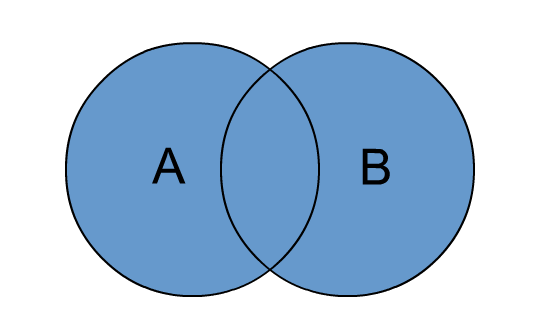

## ***Join:***

**Método join faz "join" pelos indices"**

In [ ]:
df.join(df2)

,a,b,c,d,e,f
A,1,2,3,16.0,17.0,7.0
B,4,5,6,NaN,NaN,NaN
C,7,8,9,NaN,NaN,NaN
D,10,11,12,NaN,NaN,NaN
E,13,14,15,18.0,19.0,7.0


## **Índice Multinível:**

In [ ]:
nivel = ['LV1', 'LV1', 'LV1', 'LV2', 'LV2', 'LV2']
index_nivel = ['A', 'B', 'C', 1, 2, 3]
hier_index = list(zip(nivel, index_nivel))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [ ]:
df8 = pd.DataFrame(np.arange(1, 19).reshape(6, 3), index=hier_index, columns=['a', 'b', 'c'])
df8

a   b   c
LV1 A   1   2   3
    B   4   5   6
    C   7   8   9
LV2 1  10  11  12
    2  13  14  15
    3  16  17  18

In [ ]:
df8.index.names = ['LVL', 'EX']
df8.loc['LV1']

,a,b,c
EX,,,
A,1,2,3
B,4,5,6
C,7,8,9


In [ ]:
df8.loc['LV1', 'b']

EX
A    2
B    5
C    8
Name: b, dtype: int64

KeyError: ignored